**T074 Kermeen**

**Practical 8**
**Aim: K-Means Clustering**

* **Apply the K-Means algorithm to group similar data points into clusters.**

* **Determine the optimal number of clusters using elbow method or silhouette analysis.**

* **Visualize the clustering results and analyze the cluster characteristics.**



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
df = pd.read_csv('/content/Sales_with_NaNs_v1.3.csv')
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [4]:
df.shape

(10000, 7)

In [5]:
df.describe()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,8478.000000,9233.000000,8330.000000,8360.000000
mean,203.716998,280.457952,70.252076,73.872593
std,55.273059,85.659543,16.957010,18.128351
min,24.852966,32.414352,22.202441,18.224938
25%,166.629232,221.436990,56.365513,59.925030
50%,203.323607,273.129170,69.490898,73.844594
75%,238.809147,332.570108,83.426798,90.044365
max,545.422547,818.219997,100.000000,100.000000


In [6]:
df.isnull().sum()

,0
Group,1401
Customer_Segment,1966
Sales_Before,1522
Sales_After,767
Customer_Satisfaction_Before,1670
Customer_Satisfaction_After,1640
Purchase_Made,805


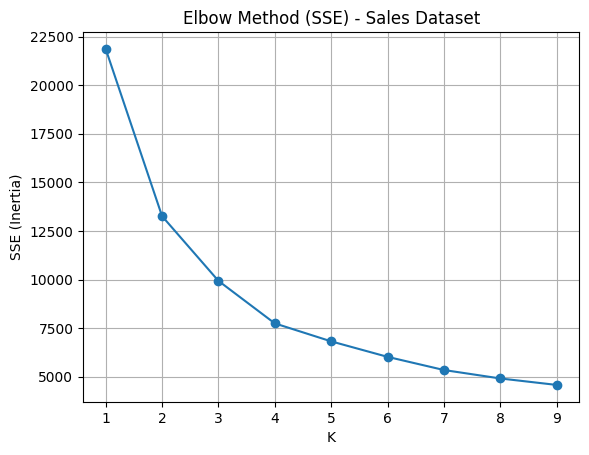

Dunn Index for K = 3: 0.009456636295015627


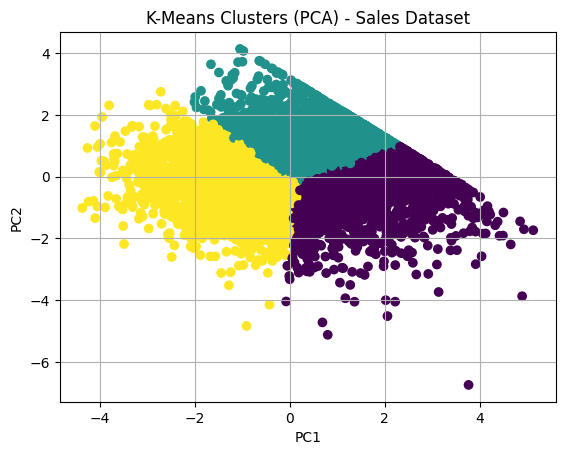


Cluster Centers (Scaled):
[[ 1.15502527  1.16876813  0.45184739  0.42269291]
 [-0.34757441 -0.39600157  0.86555768  0.88083   ]
 [-0.49517108 -0.47245434 -0.8406105  -0.83230949]]


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Select only numeric columns relevant for clustering
numerical_features = [
    "Sales_Before",
    "Sales_After",
    "Customer_Satisfaction_Before",
    "Customer_Satisfaction_After"
    # "Purchase_Made" is a categorical column and should not be directly scaled or clustered with numerical features
]

numerical_features = [col for col in numerical_features if col in df.columns]
X_raw = df[numerical_features].dropna()

# Scale the numeric data
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

# Euclidean Distance (Explicit)
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Dunn Index
def dunn_index(X, labels):
    clusters = [X[labels == i] for i in np.unique(labels)]

    # Maximum intra-cluster distance
    max_diameter = 0
    for cluster in clusters:
        if len(cluster) > 1:
            for i in range(len(cluster)):
                for j in range(i + 1, len(cluster)):
                    dist = euclidean(cluster[i], cluster[j])
                    max_diameter = max(max_diameter, dist)

    # Minimum inter-cluster distance
    min_inter = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            for p in clusters[i]:
                for q in clusters[j]:
                    dist = euclidean(p, q)
                    min_inter = min(min_inter, dist)

    return min_inter / max_diameter

# Elbow Method using Built-in KMeans++
SSE = []
K_RANGE = range(1, 10)

for k in K_RANGE:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    km.fit(X)
    SSE.append(km.inertia_)

plt.plot(K_RANGE, SSE, marker='o')
plt.title("Elbow Method (SSE) - Sales Dataset")
plt.xlabel("K")
plt.ylabel("SSE (Inertia)")
plt.grid()
plt.show()

# K-Means for K = 3 (Example, choose k based on Elbow plot)
k = 3
km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
labels = km.fit_predict(X)

# Dunn Index Calculation
dunn = dunn_index(X, labels)
print("Dunn Index for K = 3:", dunn)

# PCA Visualization
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

plt.scatter(X2[:, 0], X2[:, 1], c=labels)
plt.title("K-Means Clusters (PCA) - Sales Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

# Compare With sklearn KMeans++
sk_model = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
sk_model.fit(X)

print("\nCluster Centers (Scaled):")
print(sk_model.cluster_centers_)